<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=420/></p>

<h3 style="text-align: center;"><b>Phystech School of Applied Mathematics and Informatics (PSAMI) MIPT</b></h3>

---

<h2 style="text-align: center;"><b>One neuron on PyTorch</b></h3>

Hello! In this notebook we will learn how to train a neuron using PyTorch.

Let's briefly recap the things to keep in mind when you are writing the code for one neuron training:

- the **activation function**
- the **loss function** (`loss`)
- the **optimization method** (and `learning_rate` policy)
- the number of training **iterations** (`num_iter`)
- the **initialization** of  neuron's weights
- the **regularization** of the neuron (`weight_decay`)

Consider the binary classification task. We will use the familiar dataset "Apples and Pears":

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
data = pd.read_csv("./apples_pears.csv")

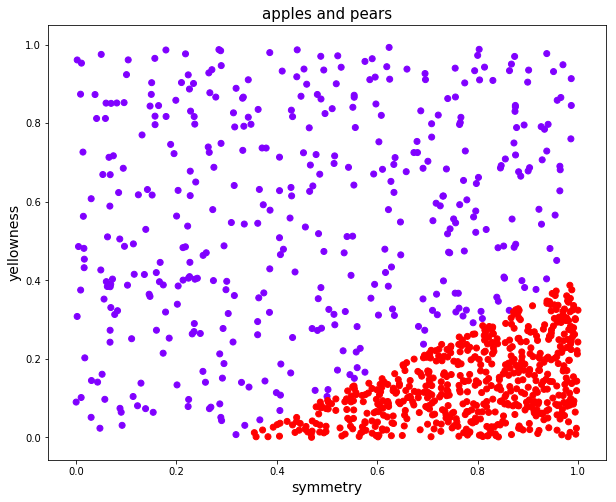

In [0]:
plt.figure(figsize=(10, 8))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=data['target'], cmap='rainbow')
plt.title('apples and pears', fontsize=15)
plt.xlabel('symmetry', fontsize=14)
plt.ylabel('yellowness', fontsize=14)
plt.show();

In [0]:
X = data.iloc[:,:2].values  # feature matrix
y = data['target'].values.reshape((-1, 1))  # classes

`torch.nn` module has all the features for creating the neural network and `torch.optim` provides different optimization methods such as `SGD` or `Adam`:

In [0]:
import torch
from torch.nn import Linear, Sigmoid

There are **two paradigms** for writing the code using PyTorch:  
- `Functional`
- `Sequential`

Let's use the sequential way for constructing and training one neuron:

In [0]:
num_features = X.shape[1]

neuron = torch.nn.Sequential(
    Linear(num_features, out_features=1),
    Sigmoid()
)

In [0]:
neuron

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): Sigmoid()
)

This object of class `Sequential` is one neuron: its weight matrix has the shape `(num_features, 1)` and its activation function is `Sigmoid`.  

In the constructor of `torch.nn.Linear()` the weights are initialized randomly, let's do the `forward_pass` and check it:

In [0]:
neuron(torch.autograd.Variable(torch.FloatTensor([1, 1])))

tensor([0.5800], grad_fn=<SigmoidBackward>)

Time to train the neuron:

In [0]:
X = torch.autograd.Variable(torch.FloatTensor(X))
y = torch.autograd.Variable(torch.FloatTensor(y))

In [0]:
# square loss (Mean Squared Error, MSE)
loss_fn = torch.nn.MSELoss(size_average=False)

# gradient descent step size
learning_rate = 0.001  # == 1e-3
# optimization method setup
optimizer = torch.optim.SGD(neuron.parameters(), lr=learning_rate)
# num_iter == 500 here
for t in range(500):
    # foward_pass
    y_pred = neuron(X)

    # print the loss on the current step
    loss = loss_fn(y_pred, y)
    print('{} {}'.format(t, loss.data))

    # zero the gradients
    optimizer.zero_grad()

    # backward_pass
    # calculation of the gradients (dLoss/dw)
    loss.backward()

    # apply gradients to the neuron parameters
    optimizer.step()

c:\users\izakharkin\anaconda3\envs\vision\lib\site-packages\torch\nn\functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


0 39.192665100097656
1 39.179386138916016
2 39.16612243652344
3 39.15287780761719
4 39.139652252197266
5 39.126441955566406
6 39.113250732421875
7 39.10008239746094
8 39.08693313598633
9 39.07380294799805
10 39.06068801879883
11 39.04759216308594
12 39.03451156616211
13 39.021453857421875
14 39.00841522216797
15 38.995391845703125
16 38.98238754272461
17 38.96940231323242
18 38.9564323425293
19 38.9434814453125
20 38.93054962158203
21 38.91763687133789
22 38.90473937988281
23 38.89186096191406
24 38.87900161743164
25 38.86616134643555
26 38.853336334228516
27 38.84053039550781
28 38.82773971557617
29 38.81496810913086
30 38.80221176147461
31 38.78947448730469
32 38.776756286621094
33 38.7640495300293
34 38.751365661621094
35 38.73869705200195
36 38.72604751586914
37 38.71341323852539
38 38.70079803466797
39 38.688201904296875
40 38.675621032714844
41 38.66305923461914
42 38.6505126953125
43 38.63798522949219
44 38.62547302246094
45 38.61297607421875
46 38.60049819946289
47 38.588039398

Get the predictions:

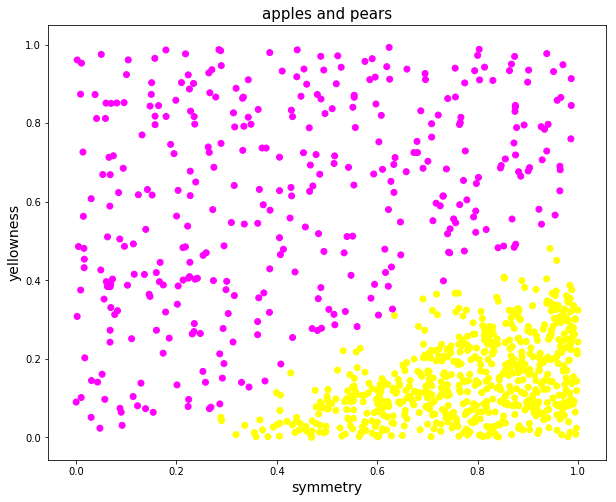

In [0]:
proba_pred = neuron(X)
y_pred = proba_pred > 0.5
y_pred = y_pred.data.numpy().reshape(-1)

plt.figure(figsize=(10, 8))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=y_pred, cmap='spring')
plt.title('apples and pears', fontsize=15)
plt.xlabel('symmetry', fontsize=14)
plt.ylabel('yellowness', fontsize=14)
plt.show();

You can change the `learning_rate` hyperparameter and the number of iterations (as well as the activation function). you can play with it and use other losses, such as `torch.nn.NLLLoss()` or `torch.nn.CrossEntropy()`.

In [0]:
<place to play!>

---

Now let's try more complex data that is not linearly separable:

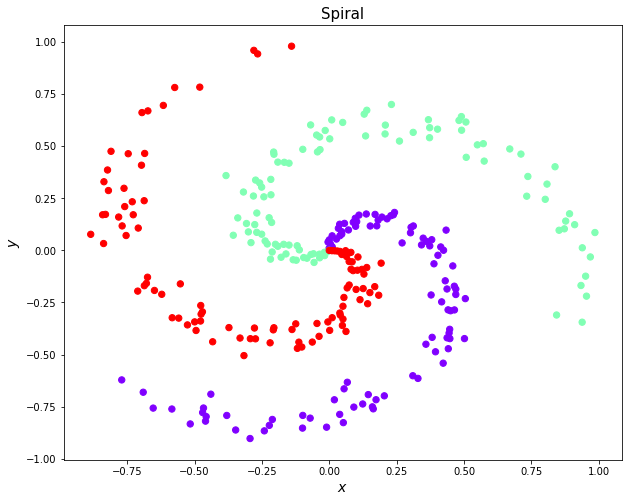

In [0]:
# code credit: http://cs231n.github.io/neural-networks-case-study/
N = 100
D = 2
K = 3
X = np.zeros((N * K, D))
y = np.zeros(N * K, dtype='uint8')

for j in range(K):
    ix = range(N * j,N * (j + 1))
    r = np.linspace(0.0, 1, N)
    t = np.linspace(j * 4, (j + 1) * 4,N) + np.random.randn(N) * 0.2 # theta
    X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
    y[ix] = j

plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.rainbow)
plt.title('Spiral', fontsize=15)
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.show();

In [0]:
X = torch.autograd.Variable(torch.FloatTensor(X))
y = torch.autograd.Variable(torch.LongTensor(y.astype(np.int64)))

In [0]:
print(X.data.shape, y.data.shape)

torch.Size([300, 2]) torch.Size([300])


Time to train one neuron to classify this non-linear data:

In [0]:
# N = batch_size
# D_in = input dimensionality (num_features)
# D_out = output dimensionality (num_classes)
N, D_in, D_out = 64, 2, 3

neuron = torch.nn.Sequential(
    torch.nn.Linear(D_in, D_out),
)

# see the "Multiclass Classification" lesson
loss_fn = torch.nn.CrossEntropyLoss(size_average=False)

learning_rate = 1e-4
optimizer = torch.optim.SGD(neuron.parameters(), lr=learning_rate)
for t in range(500):
    # forward
    y_pred = neuron(X)

    # loss
    loss = loss_fn(y_pred, y)
    print('{} {}'.format(t, loss.data))

    optimizer.zero_grad()

    # backward
    loss.backward()

    # updating the weights
    optimizer.step()

c:\users\izakharkin\anaconda3\envs\vision\lib\site-packages\torch\nn\functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


0 377.1738586425781
1 376.7501220703125
2 376.32818603515625
3 375.9081726074219
4 375.4894104003906
5 375.0721740722656
6 374.65667724609375
7 374.24261474609375
8 373.8302001953125
9 373.4190979003906
10 373.0096435546875
11 372.6017761230469
12 372.1954040527344
13 371.79052734375
14 371.386962890625
15 370.9852600097656
16 370.5845642089844
17 370.1856689453125
18 369.7880859375
19 369.3918151855469
20 368.9972229003906
21 368.60400390625
22 368.2121276855469
23 367.8216552734375
24 367.4327392578125
25 367.04473876953125
26 366.65869140625
27 366.2735290527344
28 365.89013671875
29 365.5079040527344
30 365.12725830078125
31 364.7475891113281
32 364.3695983886719
33 363.9926452636719
34 363.6172790527344
35 363.2430114746094
36 362.87005615234375
37 362.4985656738281
38 362.1284484863281
39 361.7593078613281
40 361.3917236328125
41 361.02520751953125
42 360.6600341796875
43 360.2960205078125
44 359.9333801269531
45 359.57220458984375
46 359.2121887207031
47 358.85296630859375
48 35

396 283.8219299316406
397 283.70220947265625
398 283.58306884765625
399 283.4640808105469
400 283.34552001953125
401 283.2271423339844
402 283.1092834472656
403 282.99169921875
404 282.8743896484375
405 282.7574462890625
406 282.6409912109375
407 282.52484130859375
408 282.4088439941406
409 282.2931823730469
410 282.1779479980469
411 282.0630798339844
412 281.9485778808594
413 281.83441162109375
414 281.7204895019531
415 281.6068115234375
416 281.4936218261719
417 281.3806457519531
418 281.26824951171875
419 281.15582275390625
420 281.0438537597656
421 280.93218994140625
422 280.821044921875
423 280.7098693847656
424 280.5993347167969
425 280.4888916015625
426 280.37884521484375
427 280.26910400390625
428 280.1595764160156
429 280.0505676269531
430 279.9417419433594
431 279.8332824707031
432 279.7251892089844
433 279.6173400878906
434 279.5096740722656
435 279.40234375
436 279.2954406738281
437 279.18890380859375
438 279.0825500488281
439 278.9764709472656
440 278.8707580566406
441 278

In [0]:
# back to NumPy arrays for plotting
X = X.data.numpy()
y = y.data.numpy()

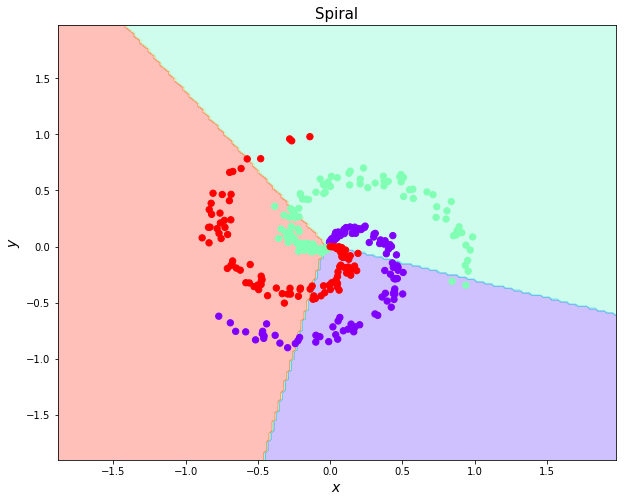

In [0]:
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
grid_tensor = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])

Z = neuron(torch.autograd.Variable(grid_tensor))
Z = Z.data.numpy()
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 8))

plt.contourf(xx, yy, Z, cmap=plt.cm.rainbow, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.rainbow)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.title('Spiral', fontsize=15)
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.show();

We can see that one neuron is not able to discriminate between these three classes (performs poorly). In the next tutorial we will get to know about how to solve this problem with Multilayer Neural Network.

<h3 style="text-align: center;"><b>Further reading</b></h3>

1). *Neural Networks on PyTorch examples (official tutorials):  
https://pytorch.org/tutorials/beginner/pytorch_with_examples.html#examples  
https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html*

2). *cs231n course:  http://cs231n.github.io/*  

3). *cs231n lecture notes*:  

http://cs231n.github.io/neural-networks-1/,  
http://cs231n.github.io/neural-networks-2/,  
http://cs231n.github.io/neural-networks-3/,  
http://cs231n.github.io/neural-networks-case-study/#linear

4). *Good article about the basics of neural networks:  http://neuralnetworksanddeeplearning.com/chap1.html*

5). *Convnet.js library for NN visualization:  https://cs.stanford.edu/people/karpathy/convnetjs/*